In [16]:
#*************************************************** Ejemplo 2.1 ***************************************************
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [20]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
import math

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6.0
k2 = 4.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo_2.1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], np.abs((w1[0]-(np.cos(np.sqrt(2)*t1)))/(np.cos(np.sqrt(2)*t1))), np.abs((w1[2]-(2*np.cos(np.sqrt(2)*t1)))/(2*np.cos(np.sqrt(2)*t1))),  file=f)

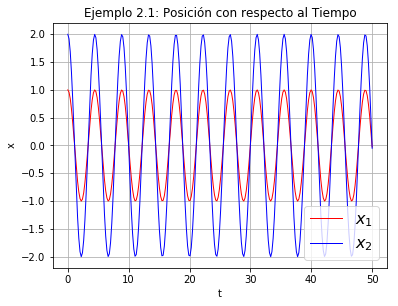

In [9]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo_2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1

plot(t, x1, 'r', linewidth=lw)
plot(t, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Ejemplo 2.1: Posición con respecto al Tiempo')
savefig('ejemplo_2.1.1.png', dpi=100)

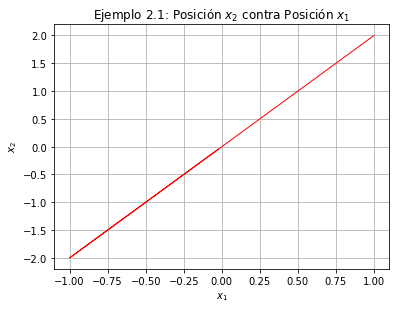

In [11]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo_2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

ylabel('$x_2$')
xlabel('$x_1$')
grid(True)
lw = 1

plot(x1, x2, 'r', linewidth=lw)

title('Ejemplo 2.1: Posición $x_2$ contra Posición $x_1$')
savefig('ejemplo_2.1.2.png', dpi=100)

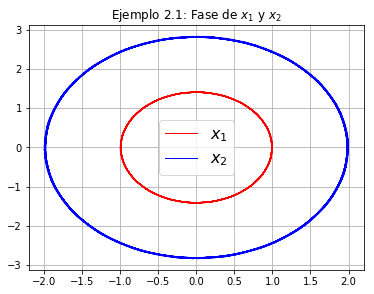

In [15]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo_2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))


grid(True)
lw = 1

plot(x1, y1, 'r', linewidth=lw)
plot(x2, y2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Ejemplo 2.1: Fase de $x_1$ y $x_2$')
savefig('ejemplo_2.1.3.png', dpi=100)

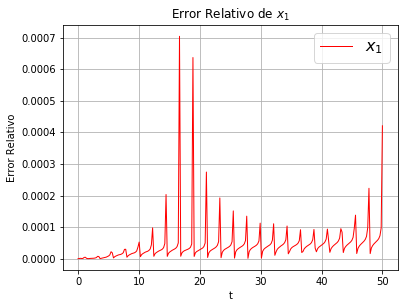

In [13]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo_2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('Error Relativo')
grid(True)
#hold(True)
lw = 1

plot(t, e1, 'red', linewidth=lw)


legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Error Relativo de $x_1$')
savefig('error2.1.1.png', dpi=100)

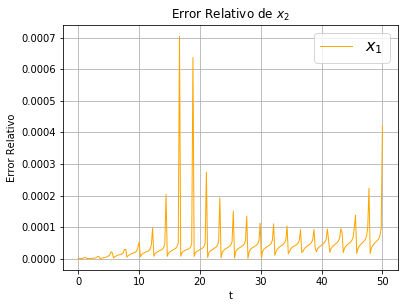

In [14]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo_2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('Error Relativo')
grid(True)
#hold(True)
lw = 1


plot(t, e2, 'orange', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Error Relativo de $x_2$')
savefig('error2.1.2.png', dpi=100)